### PYTHON - EXPLORATORY DATA ANALYSIS ON SPOTIFY 2023 DATASET

##### ---------------------------------------------------------------------------------------------------------------------------

##### Name: ARAO, Angeline Jeannah E.
##### Year & Section: 2ECE-A

##### ---------------------------------------------------------------------------------------------------------------------------

In [244]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
# Reads the excel file into a DataFrame

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
spotify_ds = pd.read_excel('spotify-2023.xlsx')
spotify_ds

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425.0,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946.0,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418.0,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194.0,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953.0,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339.0,170,D,Minor,81,56,48,21,0,8,33


##### ---------------------------------------------------------------------------------------------------------------------------
### Overview of Dataset

##### How many rows and columns does the dataset contain?

In [248]:
# Determine the number of rows and columns

print("Rows, Columns:", spotify_ds.shape)

Rows, Columns: (953, 24)


##### What are the data types of each column? Are there any missing values?

In [260]:
# Determine the data types and if there is any missing values

print('Data Types:' ,spotify_ds.info())
print('\n\nMissing Values:\n',spotify_ds.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

##### ---------------------------------------------------------------------------------------------------------------------------
### Basic Descriptive Statistics

##### What are the mean, median, and standard deviation of the streams column?

In [273]:
# Convert 'streams' to numeric
spotify_ds['streams'] = pd.to_numeric(spotify_ds['streams'],errors='coerce')

# Remove non-numeric rows
spotify_ds = spotify_ds.dropna(subset=['streams'])

# Calculate mean, median, and standard deviation
mean = spotify_ds['streams'].mean()
median = spotify_ds['streams'].median()
std = spotify_ds['streams'].std()

# Display the output
print('Mean: ' ,mean)
print('Median: ' ,median)
print('Standard Deviation: ' ,std)

Mean:  514137424.93907565
Median:  290530915.0
Standard Deviation:  566856949.0388832


##### What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

Text(0, 0.5, 'Frequency')

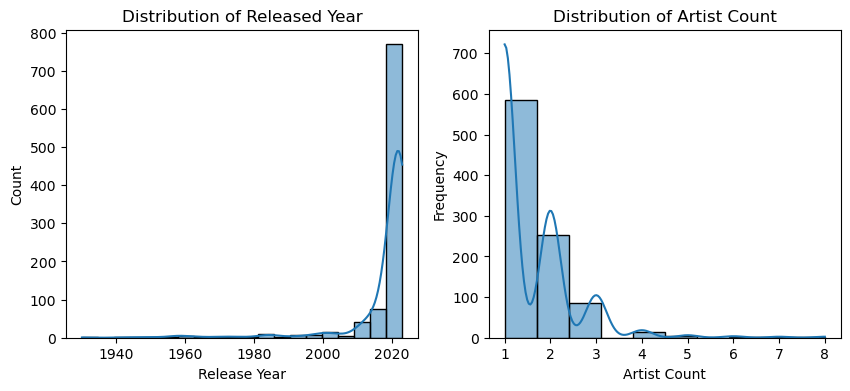

In [316]:
# Convert 'artist_count' and 'released_year' columns to numeric
spotify_ds['artist_count'] = pd.to_numeric(spotify_ds['artist_count'], errors='coerce')
spotify_ds['released_year'] = pd.to_numeric(spotify_ds['released_year'], errors='coerce')

# Remove non-numeric rows
spotify_ds = spotify_ds.dropna(subset=['released_year', 'artist_count'])

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot
sns.histplot(spotify_ds['released_year'], bins=20, kde=True, ax=ax[0])
ax[0].set_title("Distribution of Released Year")
ax[0].set_xlabel("Release Year")
axes[0].set_ylabel("Frequency")

# Plot
sns.histplot(spotify_ds['artist_count'], bins=10, kde=True, ax=ax[1])
ax[1].set_title("Distribution of Artist Count")
ax[1].set_xlabel("Artist Count")
ax[1].set_ylabel("Frequency")

##### ---------------------------------------------------------------------------------------------------------------------------
### Top Performers

##### Which track has the highest number of streams? Display the top 5 most streamed tracks.

In [323]:
# Sort from highest to lowest
sort = spotify_ds.sort_values(by='streams', ascending=False)

# Display the top 5 most streamed tracks
top_5 = sort.head()
top_5.loc[:,['track_name','artist(s)_name','streams']]

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


##### Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [330]:
# Split to convert individual artist names into a list
artist = spotify_ds['artist(s)_name'].str.split(', ')

# Breaks down lists of artists into individual rows, counts the frequency of each artist, and then displays the top 5 most common artists
data = artist.explode().value_counts().head()

# Convert to dataframe
top5_artists = exploded_data.reset_index()
top5_artists.columns = ['Artist', 'Track Count']
top5_artists

,Artist,Track Count
0,Bad Bunny,40
1,Taylor Swift,38
2,The Weeknd,37
3,SZA,23
4,Kendrick Lamar,23


##### ---------------------------------------------------------------------------------------------------------------------------
### Temporal Trends

##### Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

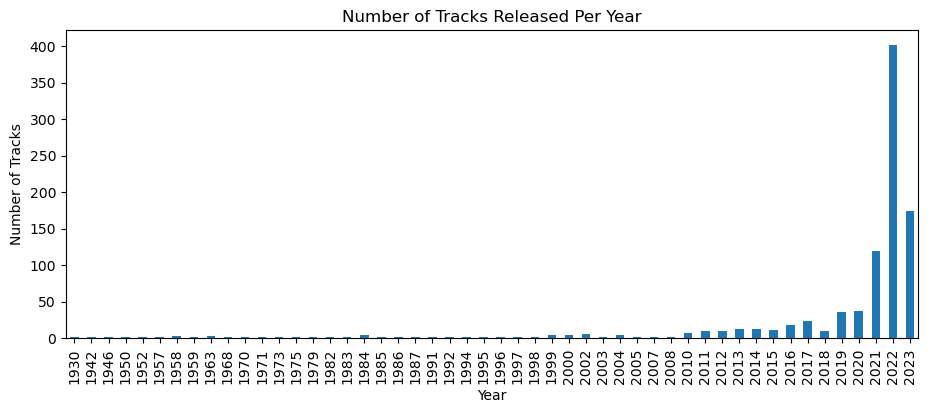

In [354]:
plt.figure(figsize=(11, 4))
spotify_ds['released_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show()

##### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

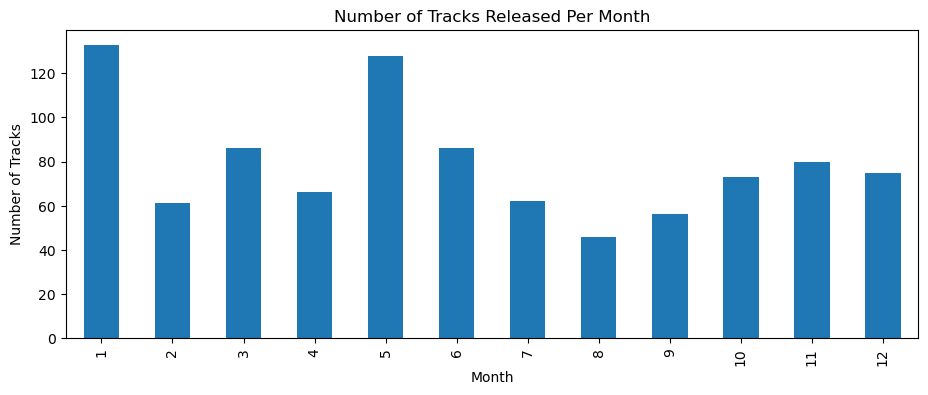

In [363]:
plt.figure(figsize=(11, 4))
spotify_ds['released_month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.show()

##### ---------------------------------------------------------------------------------------------------------------------------
### Genre and Music Characteristics

##### Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

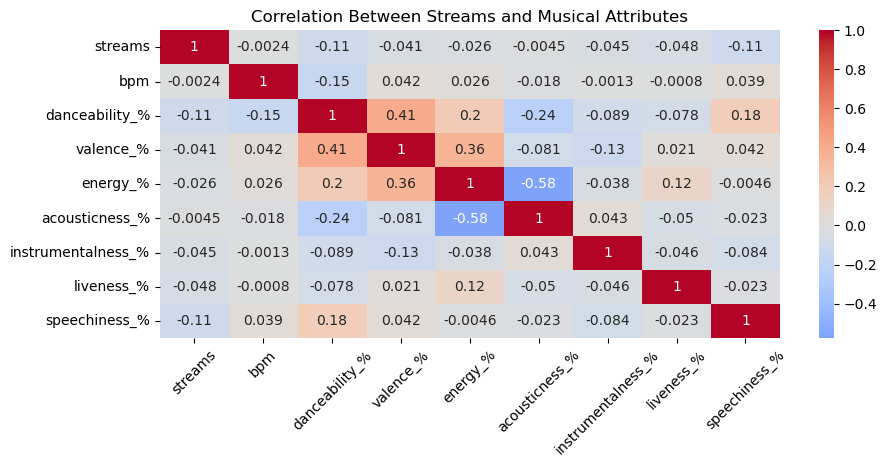

In [396]:
# Convert columns to numeric
col = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
for col in col:
    spotify_ds[col] = pd.to_numeric(spotify_ds[col], errors='coerce')
    
# Correlation between streams and musical attributes
corr = spotify_ds[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()

# Heat map
plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Streams and Musical Attributes')
plt.xticks(rotation=45)
plt.show()

##### Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

In [409]:
dnc_enr = correlation.loc['danceability_%', 'energy_%']
val_acou = correlation.loc['valence_%', 'acousticness_%']

print(f"Correlation Between Danceability and Energy: {dnc_enr:.2f}")
print(f"Correlation Between Valence and Acousticness: {val_acou:.2f}")

Correlation Between Danceability and Energy: 0.20
Correlation Between Valence and Acousticness: -0.08


##### ---------------------------------------------------------------------------------------------------------------------------
### Platform Popularity

##### How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

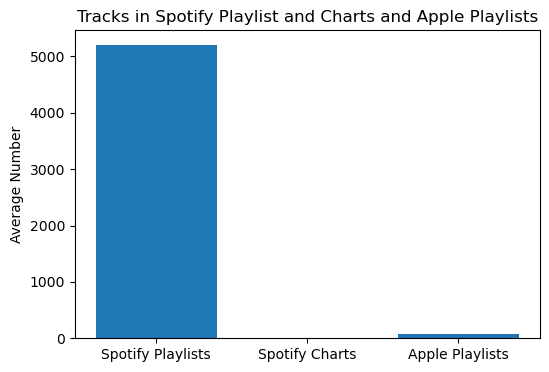

In [447]:
spotify_playlists = spotify_ds['in_spotify_playlists'].mean()
spotify_charts = spotify_ds['in_spotify_charts'].mean()
apple_playlists = spotify_ds['in_apple_playlists'].mean()

platforms = [spotify_playlists, spotify_charts, apple_playlists]
labels = ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists']

plt.figure(figsize=(6, 4))
plt.bar(labels, platforms)
plt.ylabel('Average Number')
plt.title('Tracks in Spotify Playlist and Charts and Apple Playlists')
plt.show()

##### ---------------------------------------------------------------------------------------------------------------------------
### Advanced Analysis

##### Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

In [449]:
ave_streams = spotify_ds.groupby('key')['streams'].mean().sort_values(ascending=False).reset_index()
ave_streams.columns = ['Key', 'Average Streams']
print("Average Streams by Key:")
display(ave_streams)

Average Streams by Key:


,Key,Average Streams
0,C#,6.042802e+08
1,E,5.774972e+08
2,D#,5.530365e+08
3,A#,5.524754e+08
4,D,5.295256e+08
5,F#,5.223632e+08
6,B,5.193480e+08
7,G#,4.769119e+08
8,F,4.684464e+08
9,G,4.525994e+08


##### Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

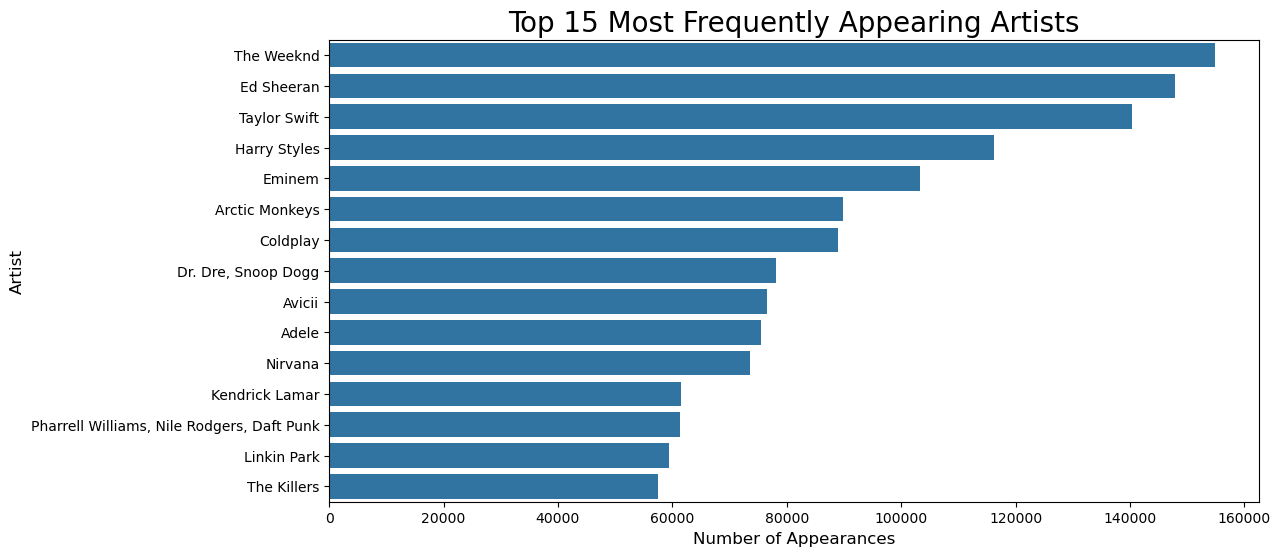

In [475]:
pltfrm = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts']
artists = spotify_ds.groupby("artist(s)_name")[pltfrm].sum().sum(axis=1).sort_values(ascending=False)

top_15 = artists.head(15).reset_index()
top_15.columns = ['Artist', 'Number of Appearances']

plt.figure(figsize = (12, 6))
sns.barplot(data = top_15, x = 'Number of Appearances', y = 'Artist', dodge = False, legend = False)
plt.title('Top 15 Most Frequently Appearing Artists', fontsize = 20)
plt.xlabel('Number of Appearances', fontsize = 12)
plt.ylabel('Artist', fontsize = 12)
plt.grid(axis = 'x', linestyle = '--', alpha = 0)
plt.show()